In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import metrics 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
#loading data
file_1="/workspaces/State-of-Health-Estimation-Battery/Dataset/B0005_dis_dataset.csv"
file_2="/workspaces/State-of-Health-Estimation-Battery/Dataset/B0006_dis_dataset.csv"
dataset_1=pd.read_csv(file_1)
dataset_2=pd.read_csv(file_2)

C_max=2

#renaming columns for simplicity
dataset_1.columns=['cycle',"capacity",'voltage', 'current','temperature', 'current_load', 'voltage_load',"time"]
dataset_1["current_load"]= abs(dataset_1["current_load"])

#removing ideling / starting and ending current level data  
df_1=dataset_1[(dataset_1.current_load>=0.006)].reset_index(drop=True)

# converting time seconds->hour
df_1["time"]=df_1["time"]/3600

#calculate Soc for each cycle
cycle_count=df_1["cycle"].unique()
Soc_list=[]

# Update Soc for each reading within each cycle using Coulomb counting
for cycle in cycle_count:
    cycle_data = df_1[df_1['cycle'] == cycle]
    
    cumulative_Soc = [sum(cycle_data["capacity"])/len(cycle_data["capacity"])]
    
    for i in range(1, len(cycle_data)):
        
        delta_time = cycle_data['time'].iloc[i-1] - cycle_data['time'].iloc[i]
        
        delta_charge = cycle_data['current'].iloc[i] * delta_time
        
        cumulative_Soc.append(cumulative_Soc[-1] -delta_charge)
        
    Soc_list.extend(cumulative_Soc)

#DOD is the opposite of the soc 
df_1["Soc"] = [(q / C_max) for q in Soc_list]
df_1["Soh"]=df_1["capacity"]/C_max

# selecting parameters 
att_=["cycle","capacity","voltage","current","temperature","current_load","voltage_load","time","Soc"]
att=["cycle","current_load","voltage_load","Soc","time"]
X_axis="cycle"

#seperating dataset
X_train = df_1[att]
y_train = df_1[["Soh"]]



#renaming columns for simplicity
dataset_2.columns=['cycle',"capacity",'voltage', 'current','temperature', 'current_load', 'voltage_load',"time"]
dataset_2["current_load"]= abs(dataset_2["current_load"])

#removing ideling / starting and ending current level data  
df_2=dataset_2[(dataset_2.current_load>=0.006)].reset_index(drop=True)

# converting time seconds->hour
df_2["time"]=df_2["time"]/3600

#calculate Soc for each cycle
cycle_count=df_2["cycle"].unique()
Soc_list=[]

# Update Soc for each reading within each cycle using Coulomb counting
for cycle in cycle_count:
    cycle_data = df_2[df_2['cycle'] == cycle]
    
    cumulative_Soc = [sum(cycle_data["capacity"])/len(cycle_data["capacity"])]
    
    for i in range(1, len(cycle_data)):
        
        delta_time = cycle_data['time'].iloc[i-1] - cycle_data['time'].iloc[i]
        
        delta_charge = cycle_data['current'].iloc[i] * delta_time
        
        cumulative_Soc.append(cumulative_Soc[-1] -delta_charge)
        
    Soc_list.extend(cumulative_Soc)

#DOD is the opposite of the soc 
df_2["Soc"] = [(q / C_max) for q in Soc_list]
df_2["Soh"]=df_2["capacity"]/C_max

X_test = df_2[att]
y_test = df_2[["Soh"]]

In [3]:
svr1= SVR(kernel='rbf', C=1, gamma='scale')
svr1.fit(X_train,y_train.values.ravel())
y_pred_1= svr1.predict(X_test)

In [4]:
svr2= SVR(kernel='linear', C=1, gamma='scale')
svr2.fit(X_train,y_train.values.ravel())
y_pred_2= svr2.predict(X_test)

In [5]:
svr3_1= SVR(kernel='poly', C=1, gamma='scale', degree=1)
svr3_1.fit(X_train,y_train.values.ravel())
y_pred_3_1= svr3_1.predict(X_test)

In [6]:
svr3_2 = SVR(kernel='poly', C=1, gamma='scale', degree=2)
svr3_2.fit(X_train,y_train.values.ravel())
y_pred_3_2= svr3_2.predict(X_test)

In [7]:
svr3_3= SVR(kernel='poly', C=1, gamma='scale', degree=3)
svr3_3.fit(X_train,y_train.values.ravel())
y_pred_3_3= svr3_3.predict(X_test)

In [8]:
svr3_4= SVR(kernel='poly', C=1, gamma='scale', degree=4)
svr3_4.fit(X_train,y_train.values.ravel())
y_pred_3_4= svr3_4.predict(X_test)

In [9]:
svr3_5= SVR(kernel='poly', C=1, gamma='scale', degree=5)
svr3_5.fit(X_train,y_train.values.ravel())
y_pred_3_5= svr3_5.predict(X_test)

In [18]:
def graph_plot(a,model):
    plt.plot(X_test["cycle"],y_test,color='red',label='actual',linewidth=2)
    plt.plot(X_test["cycle"],a,color='blue',label='SVM-'+model,linewidth=2)
    plt.xlabel("cycle")
    plt.ylabel("SOH")
    rmse="Rmse = "+str(np.sqrt(metrics.mean_squared_error(y_test, a)))
    plt.figtext(0.33, -0.03, rmse, fontsize=10)
    plt.legend(loc="upper right")
    plt.suptitle("Support Vector Regressor kernal:"+model)
    plt.show()
    print(np.sqrt(metrics.mean_squared_error(y_test, a)))

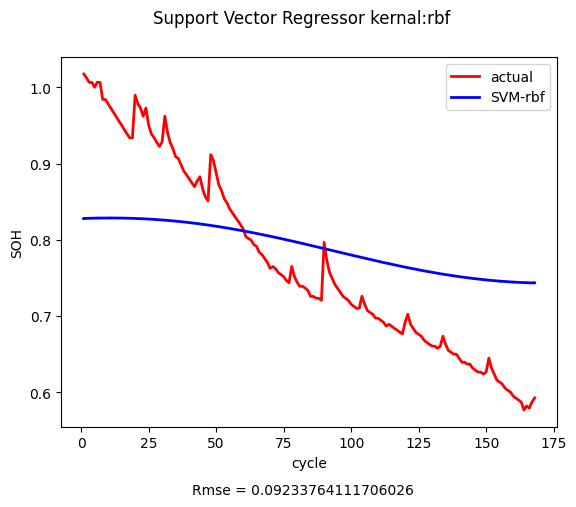

0.09233764111706026


In [19]:
graph_plot(y_pred_1,"rbf")

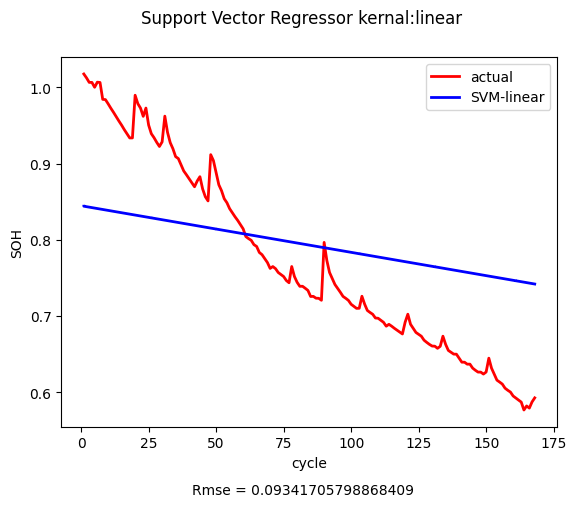

0.09341705798868409


In [20]:
graph_plot(y_pred_2,"linear")

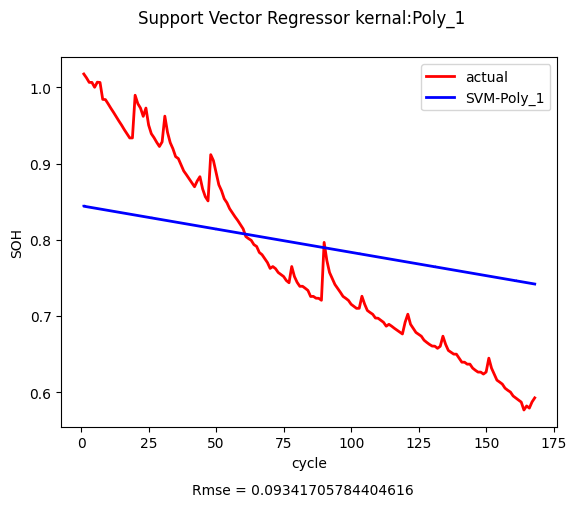

0.09341705784404616


In [21]:
graph_plot(y_pred_3_1,"Poly_1")

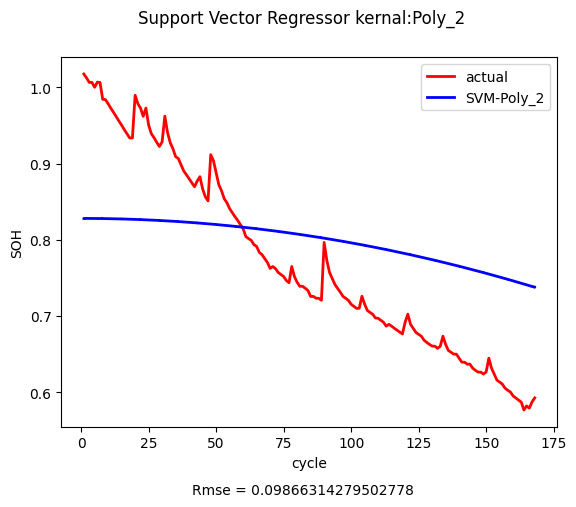

0.09866314279502778


In [22]:
graph_plot(y_pred_3_2,"Poly_2")

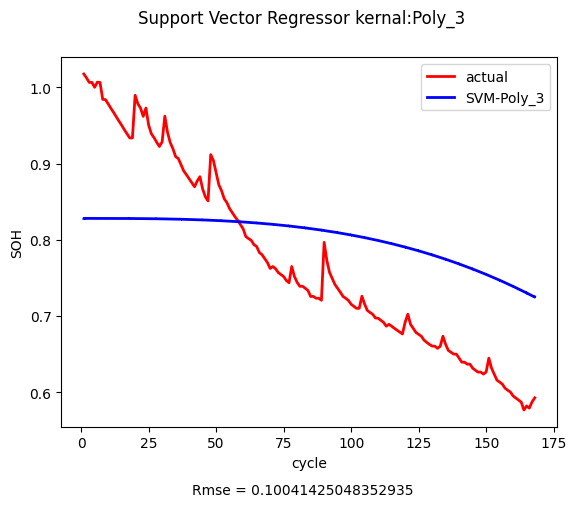

0.10041425048352935


In [23]:
graph_plot(y_pred_3_3,"Poly_3")

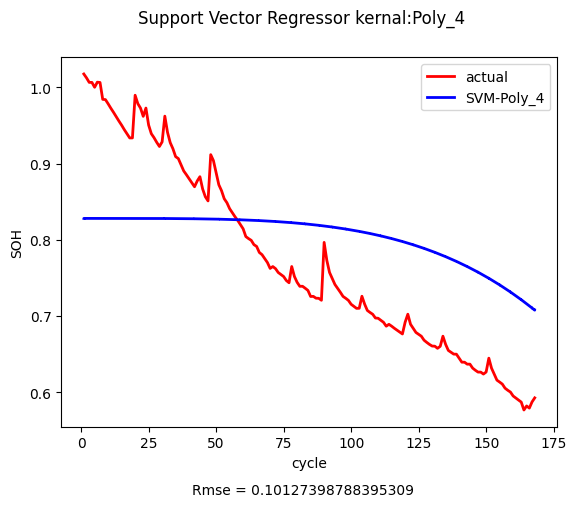

0.10127398788395309


In [24]:
graph_plot(y_pred_3_4,"Poly_4")

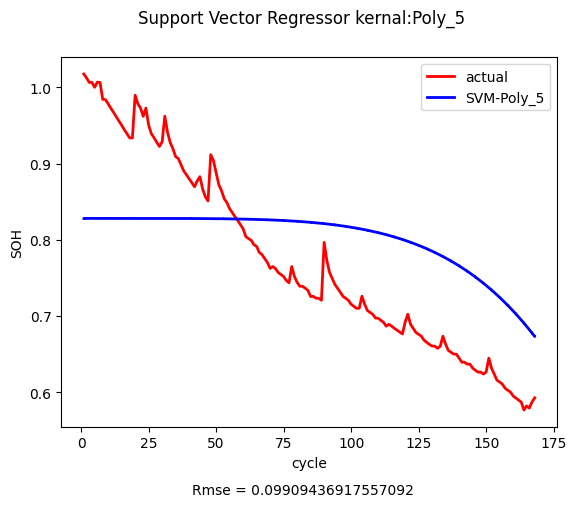

0.09909436917557092


In [25]:
graph_plot(y_pred_3_5,"Poly_5")